# SI 618 - Homework #4: Visualization, Correlation, and Linear Models

Version 2022.02.07.1.CT

### The total score for this assignment will be 100 points, consisting of:
- 10 pt: Overall quality of spelling, grammar, punctuation, etc. of written sentences.
- 10 pt: Code is written in [PEP 8](https://www.python.org/dev/peps/pep-0008/) style.
- 80 pt: Homework questions. 

In [1]:
MY_UNIQNAME = 'ellali'

## We will be using two different datasets for the two different parts of this homework. Download the data from: 

* [https://www.kaggle.com/datasnaek/youtube-new](https://www.kaggle.com/datasnaek/youtube-new)

> YouTube provides a list of trending videos on it's site, determined by user interaction metrics such as likes, comments, and views. This dataset includes months of daily trending video across five different regions: the United States ("US"), Canada ("CA"), Great Britain ("GB"), Germany ("DE"), and France ("FR").

* https://www.kaggle.com/abcsds/pokemon

> This data set includes 721 Pokemon, including their number, name, first and second type, and basic stats: HP, Attack, Defense, Special Attack, Special Defense, and Speed.

## Part 1: Answer the questions below based on the *[YouTube dataset](https://www.kaggle.com/datasnaek/youtube-new)*
- Write Python code that can answer the following questions, and
- <b>Explain your answers in plain English. </b>

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
# import packages
import pandas as pd
import numpy as np
import seaborn as sns
import scipy
import matplotlib.pyplot as plt

import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.formula.api import ols
import scipy.stats as stats

In [4]:
# csv
youtube_CA = pd.read_csv('hw4/CAvideos.csv')
youtube_DE = pd.read_csv('hw4/DEvideos.csv')
youtube_FR = pd.read_csv('hw4/FRvideos.csv')
youtube_GB = pd.read_csv('hw4/GBvideos.csv')
youtube_IN = pd.read_csv('hw4/INvideos.csv')
youtube_US = pd.read_csv('hw4/USvideos.csv')
youtube_JP = pd.read_csv('hw4/JPvideos.csv')
youtube_KR = pd.read_csv('hw4/KRvideos.csv')
youtube_MX = pd.read_csv('hw4/MXvideos.csv')
youtube_RU = pd.read_csv('hw4/RUvideos.csv')

pokemon = pd.read_csv('hw4/Pokemon.csv')

In [5]:
# dropna
youtube_CA = youtube_CA.dropna()
youtube_DE = youtube_DE.dropna()
youtube_FR = youtube_FR.dropna()
youtube_GB = youtube_GB.dropna()
youtube_IN = youtube_IN.dropna()
youtube_US = youtube_US.dropna()
youtube_JP = youtube_JP.dropna()
youtube_KR = youtube_KR.dropna()
youtube_MX = youtube_MX.dropna()
youtube_RU = youtube_RU.dropna()

pokemon = pokemon.dropna()

### <span style="color:magenta">  Q1. For 15 Points: Compare the distributions of comments, views, likes, and dislikes for </span>

* Plot histograms for these metrics *for Canada*. What can you say about them?
* Try to apply a log transformation, and plot the histograms again. How do they look now?
* Create a pairplot *for Canada*, as we did in this week's class. Do you see anything interesting?
* Create additional pairplots for the other four regions. Do they look similar?

In [6]:
# Plot histograms for these metrics for Canada. What can you say about them?
youtube_CA.head(5)

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description
0,n1WpP7iowLc,17.14.11,Eminem - Walk On Water (Audio) ft. Beyoncé,EminemVEVO,10,2017-11-10T17:00:03.000Z,"Eminem|""Walk""|""On""|""Water""|""Aftermath/Shady/In...",17158579,787425,43420,125882,https://i.ytimg.com/vi/n1WpP7iowLc/default.jpg,False,False,False,Eminem's new track Walk on Water ft. Beyoncé i...
1,0dBIkQ4Mz1M,17.14.11,PLUSH - Bad Unboxing Fan Mail,iDubbbzTV,23,2017-11-13T17:00:00.000Z,"plush|""bad unboxing""|""unboxing""|""fan mail""|""id...",1014651,127794,1688,13030,https://i.ytimg.com/vi/0dBIkQ4Mz1M/default.jpg,False,False,False,STill got a lot of packages. Probably will las...
2,5qpjK5DgCt4,17.14.11,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,23,2017-11-12T19:05:24.000Z,"racist superman|""rudy""|""mancuso""|""king""|""bach""...",3191434,146035,5339,8181,https://i.ytimg.com/vi/5qpjK5DgCt4/default.jpg,False,False,False,WATCH MY PREVIOUS VIDEO ▶ \n\nSUBSCRIBE ► http...
3,d380meD0W0M,17.14.11,I Dare You: GOING BALD!?,nigahiga,24,2017-11-12T18:01:41.000Z,"ryan|""higa""|""higatv""|""nigahiga""|""i dare you""|""...",2095828,132239,1989,17518,https://i.ytimg.com/vi/d380meD0W0M/default.jpg,False,False,False,I know it's been a while since we did this sho...
4,2Vv-BfVoq4g,17.14.11,Ed Sheeran - Perfect (Official Music Video),Ed Sheeran,10,2017-11-09T11:04:14.000Z,"edsheeran|""ed sheeran""|""acoustic""|""live""|""cove...",33523622,1634130,21082,85067,https://i.ytimg.com/vi/2Vv-BfVoq4g/default.jpg,False,False,False,🎧: https://ad.gt/yt-perfect\n💰: https://atlant...


In [7]:
youtube_CA_review = youtube_CA[['views', 'likes', 'dislikes', 'comment_count']]
youtube_CA_review

,views,likes,dislikes,comment_count
0,17158579,787425,43420,125882
1,1014651,127794,1688,13030
2,3191434,146035,5339,8181
3,2095828,132239,1989,17518
4,33523622,1634130,21082,85067
...,...,...,...,...
40876,80685,1701,99,1312
40877,103339,460,66,51
40878,773347,25900,224,3881
40879,115225,2115,182,1672


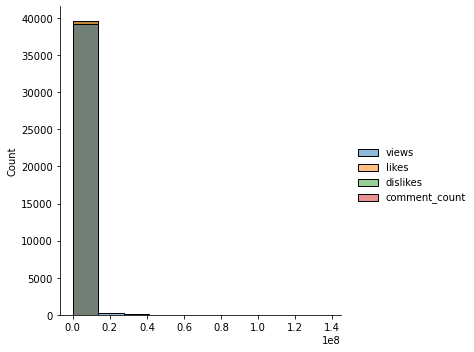

In [8]:
sns.displot(youtube_CA_review, rug=False, kde=False, bins=10, alpha=0.5)

* I couldn't see it very well because the data all overlapped and the values were too large to analyze for any useful information.

In [9]:
# Try to apply a log transformation, and plot the histograms again. How do they look now?

In [10]:
youtube_CA_review_log = np.log(youtube_CA_review)
youtube_CA_review_log

,views,likes,dislikes,comment_count
0,16.658009,13.576523,10.678675,11.743100
1,13.830055,11.758175,7.431300,9.475010
2,14.975981,11.891602,8.582794,9.009570
3,14.555459,11.792366,7.595387,9.770984
4,17.327761,14.306621,9.956175,11.351194
...,...,...,...,...
40876,11.298308,7.438972,4.595120,7.179308
40877,11.545770,6.131226,4.189655,3.931826
40878,13.558483,10.161998,5.411646,8.263848
40879,11.654642,7.656810,5.204007,7.421776


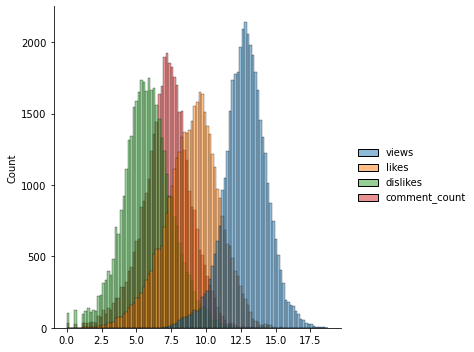

In [11]:
sns.displot(data=youtube_CA_review_log)

* The data now looks much clearer, with each color representing a different category: views, likes, dislikes and comments counts;
* Each color becomes roughly bell-shaped and is staggered with other metrics;
* It can be found that more videos will have views but not any likes or comments;
* people will be more inclined to click on likes, then comments, and the fewest will click on dislikes.

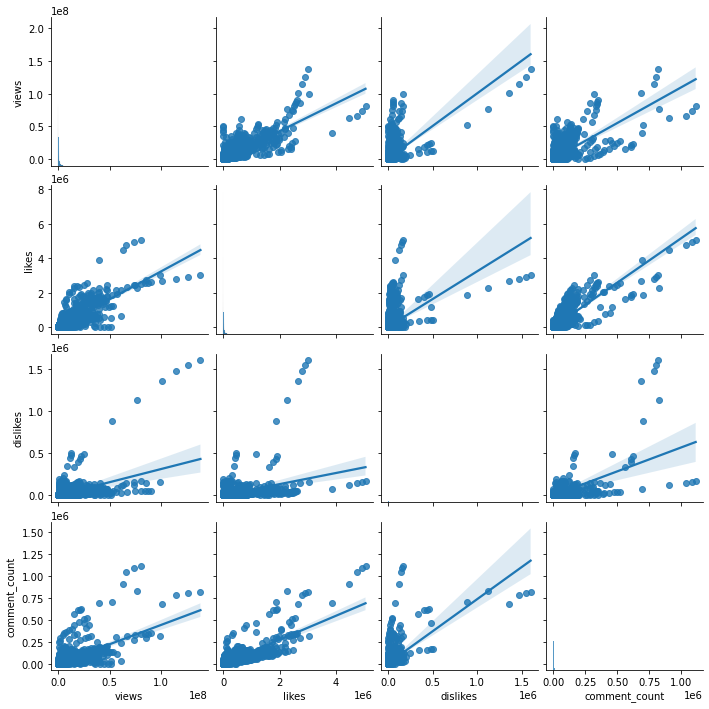

In [12]:
# Create a pairplot for Canada, as we did in this week's class. Do you see anything interesting?
sns.pairplot(youtube_CA_review, vars=[
             'views', 'likes', 'dislikes', 'comment_count'], kind='reg')

* According to the slope of the different pairplots in the first column of the pairplot, as the views increase, the likes increase the most, followed by comments and dislikes, which is consistent with what we found in the histplot.

* However, it can be found that there are some outliers in the plots of views-dislikes, which are not concentrated with the rest of the data, which may represent that there are some videos with very high views that have a lot of dislikes.

* It can be found that in the graph of likes-dislikes, as the number of likes increases, the number of dislikes does not increase much, which indicates that people generally do not click on likes and dislikes at the same time.

* There is some correlation between views, likes and comments.

In [13]:
# Create additional pairplots for the other four regions. Do they look similar?

In [14]:
display(len(youtube_JP))
display(len(youtube_US))
display(len(youtube_GB))
display(len(youtube_KR))

18399

40379

38304

31404

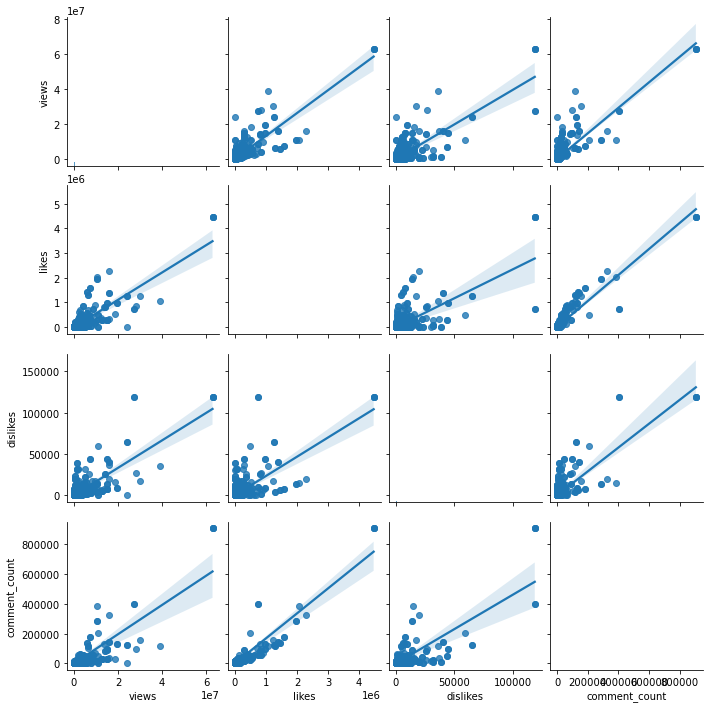

In [15]:
# 1. youtube_JP
youtube_JP_review = youtube_JP[['views', 'likes', 'dislikes', 'comment_count']]
sns.pairplot(youtube_JP_review, vars=[
             'views', 'likes', 'dislikes', 'comment_count'], kind='reg')

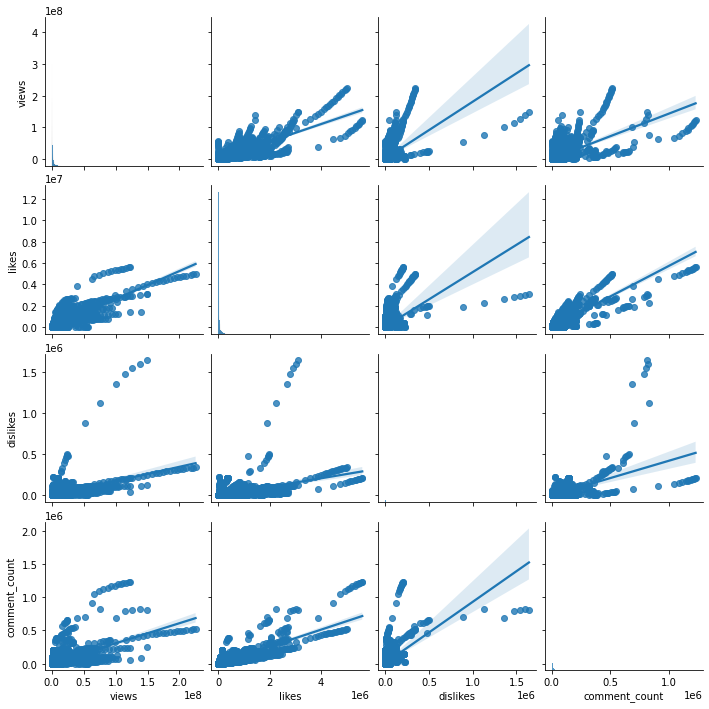

In [16]:
# 2. youtube_US
youtube_US_review = youtube_US[['views', 'likes', 'dislikes', 'comment_count']]
sns.pairplot(youtube_US_review, vars=[
             'views', 'likes', 'dislikes', 'comment_count'], kind='reg')

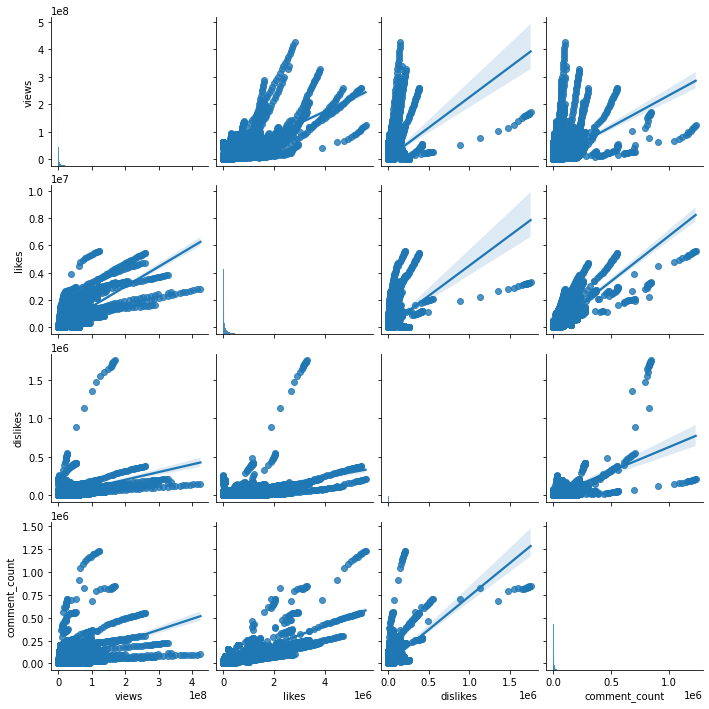

In [17]:
# 3. youtube_GB
youtube_GB_review = youtube_GB[['views', 'likes', 'dislikes', 'comment_count']]
sns.pairplot(youtube_GB_review, vars=[
             'views', 'likes', 'dislikes', 'comment_count'], kind='reg')

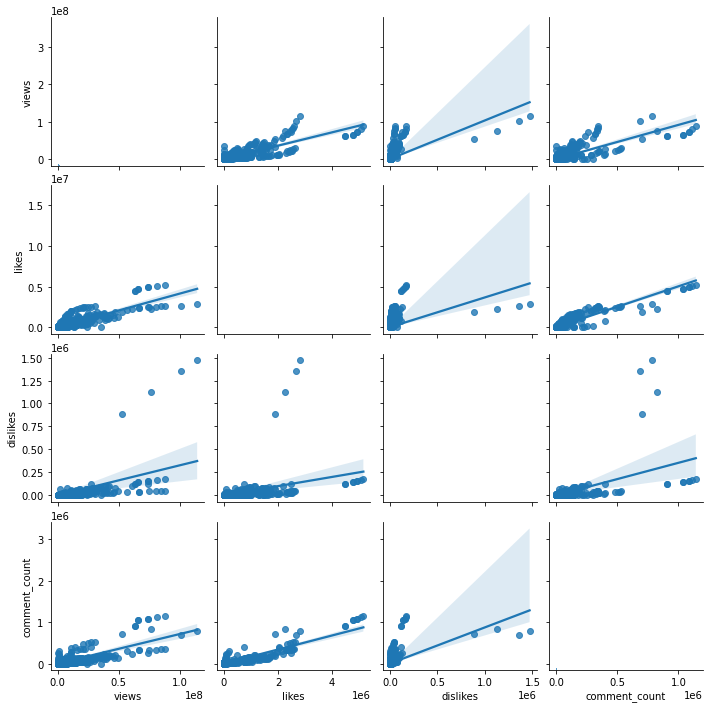

In [18]:
# 4. youtube_KR
youtube_KR_review = youtube_KR[['views', 'likes', 'dislikes', 'comment_count']]
sns.pairplot(youtube_KR_review, vars=[
             'views', 'likes', 'dislikes', 'comment_count'], kind='reg')

* They don't all look quite the same.

* The data in youtube_JP look more dispersed, with less correlation between differentvariables.

* The data in youtube_US are more concentrated on the regression line, with several variables showing better positive correlation with each other.

* youtube_GB shows some correlations between views, likes and comments, some concentrated on the regression line and a lot of outliers.

* youtube_KR shows a small amount of correlation between variables, but the overall amount of data for videos (likes, views, etc.) will be smaller

* But the regression lines for youtube_US, youtube_GB and youtube_KR look like they have similar trends.


### <span style="color:magenta"> Q2. For 10 Points: Create a heatmap of correlations between the variables for a region of your choice </span>

>A [heat map (or heatmap)](https://en.wikipedia.org/wiki/Heat_map) is a graphical representation of data where the individual values contained in a matrix are represented as colors.

Seaborn makes it easy to create a heatmap with [`seaborn.heatmap()`](https://seaborn.pydata.org/generated/seaborn.heatmap.html)

* Create a correlation matrix for your numeric variables using Pandas with [`DataFrame.corr()`](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.corr.html). That is, if your dataframe is called `df`, use `df.corr()`.
* Pass in your correlation matrix to `seaborn.heatmap()`, and annotate it with the parameter `annot=True`.
* Experiment with colormaps that are different from the default one and choose one that you think is best.  Comment on why you think so.
* Are there any interesting correlations? What are they?

In [19]:
# I choose CA as a region of my choice
# CA corr
CA_corr = youtube_CA_review.corr()
CA_corr

,views,likes,dislikes,comment_count
views,1.000000,0.829258,0.557924,0.693174
likes,0.829258,1.000000,0.460414,0.836639
dislikes,0.557924,0.460414,1.000000,0.643661
comment_count,0.693174,0.836639,0.643661,1.000000


<AxesSubplot:>

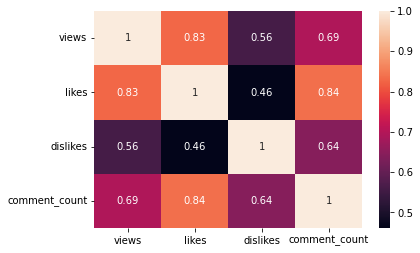

In [20]:
sns.heatmap(CA_corr, annot=True)

<AxesSubplot:>

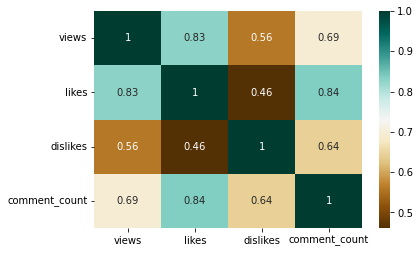

In [21]:
sns.heatmap(CA_corr, cmap='BrBG', annot=True)

<AxesSubplot:>

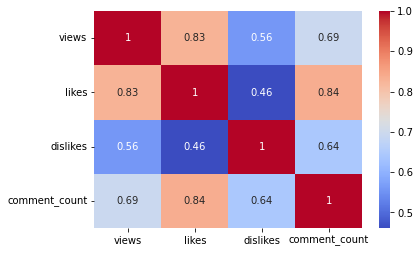

In [22]:
sns.heatmap(CA_corr, cmap='coolwarm', annot=True)

*　I prefer the cmap='coolwarm' color, because the overall color is prettier, the more relevant ones will show a warmer red, while the less relevant ones will show a cooler blue, which will give me a clear view.

In [23]:
# Are there any interesting correlations? What are they?

* Views and likes present a higher correlation, followed by commnets and finally dislikes.

* There is also a high correlation between likes and comments.

* The lowest correlation is presented between likes and dislikes = 0.46.

* The above findings are consistent with the conclusions we obtained previously, but it is particularly interesting to note that the highest correlation is between likes and comments, indicating that people prefer to comment and like at the same time.

### <span style="color:magenta"> Q3. For 15 points: Create and compare OLS models using variables of your choice, for a region of your choice </span>
* Use statsmodels to perform an ANOVA (categorical regression) of a variable of your choice as the dependent variable (for example, views) and the video category as the independent variable. Note that you need to use a categorical variable as your independent variable.
* Provide your interpretation of the results. 
* Create two different regression models where the dependent variable is the same, and the independent variables are different.  Note that your independent variable needs to be a continuous numerical variables. What does your interpretation say about the two models?

In [24]:
# I stil choose CA

In [25]:
youtube_CA

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description
0,n1WpP7iowLc,17.14.11,Eminem - Walk On Water (Audio) ft. Beyoncé,EminemVEVO,10,2017-11-10T17:00:03.000Z,"Eminem|""Walk""|""On""|""Water""|""Aftermath/Shady/In...",17158579,787425,43420,125882,https://i.ytimg.com/vi/n1WpP7iowLc/default.jpg,False,False,False,Eminem's new track Walk on Water ft. Beyoncé i...
1,0dBIkQ4Mz1M,17.14.11,PLUSH - Bad Unboxing Fan Mail,iDubbbzTV,23,2017-11-13T17:00:00.000Z,"plush|""bad unboxing""|""unboxing""|""fan mail""|""id...",1014651,127794,1688,13030,https://i.ytimg.com/vi/0dBIkQ4Mz1M/default.jpg,False,False,False,STill got a lot of packages. Probably will las...
2,5qpjK5DgCt4,17.14.11,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,23,2017-11-12T19:05:24.000Z,"racist superman|""rudy""|""mancuso""|""king""|""bach""...",3191434,146035,5339,8181,https://i.ytimg.com/vi/5qpjK5DgCt4/default.jpg,False,False,False,WATCH MY PREVIOUS VIDEO ▶ \n\nSUBSCRIBE ► http...
3,d380meD0W0M,17.14.11,I Dare You: GOING BALD!?,nigahiga,24,2017-11-12T18:01:41.000Z,"ryan|""higa""|""higatv""|""nigahiga""|""i dare you""|""...",2095828,132239,1989,17518,https://i.ytimg.com/vi/d380meD0W0M/default.jpg,False,False,False,I know it's been a while since we did this sho...
4,2Vv-BfVoq4g,17.14.11,Ed Sheeran - Perfect (Official Music Video),Ed Sheeran,10,2017-11-09T11:04:14.000Z,"edsheeran|""ed sheeran""|""acoustic""|""live""|""cove...",33523622,1634130,21082,85067,https://i.ytimg.com/vi/2Vv-BfVoq4g/default.jpg,False,False,False,🎧: https://ad.gt/yt-perfect\n💰: https://atlant...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40876,sGolxsMSGfQ,18.14.06,HOW2: How to Solve a Mystery,Annoying Orange,24,2018-06-13T18:00:07.000Z,"annoying orange|""funny""|""fruit""|""talking""|""ani...",80685,1701,99,1312,https://i.ytimg.com/vi/sGolxsMSGfQ/default.jpg,False,False,False,🚨 NEW MERCH! http://amzn.to/annoyingorange 🚨➤ ...
40877,8HNuRNi8t70,18.14.06,Eli Lik Lik Episode 13 Partie 01,Elhiwar Ettounsi,24,2018-06-13T19:01:18.000Z,"hkayet tounsia|""elhiwar ettounsi""|""denya okhra...",103339,460,66,51,https://i.ytimg.com/vi/8HNuRNi8t70/default.jpg,False,False,False,► Retrouvez vos programmes préférés : https://...
40878,GWlKEM3m2EE,18.14.06,KINGDOM HEARTS III – SQUARE ENIX E3 SHOWCASE 2...,Kingdom Hearts,20,2018-06-11T17:30:53.000Z,"Kingdom Hearts|""KH3""|""Kingdom Hearts 3""|""Froze...",773347,25900,224,3881,https://i.ytimg.com/vi/GWlKEM3m2EE/default.jpg,False,False,False,Find out more about Kingdom Hearts 3: https://...
40879,lbMKLzQ4cNQ,18.14.06,Trump Advisor Grovels To Trudeau,The Young Turks,25,2018-06-13T04:00:05.000Z,"180612__TB02SorryExcuse|""News""|""Politics""|""The...",115225,2115,182,1672,https://i.ytimg.com/vi/lbMKLzQ4cNQ/default.jpg,False,False,False,Peter Navarro isn’t talking so tough now. Ana ...


<Figure size 640x480 with 0 Axes>

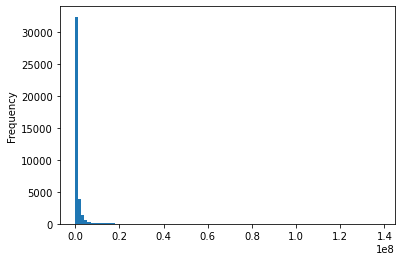

<Figure size 640x480 with 0 Axes>

In [26]:
youtube_CA['views'].plot.hist(bins=100)
plt.figure(figsize=(8, 6), dpi=80)

<AxesSubplot:ylabel='Frequency'>

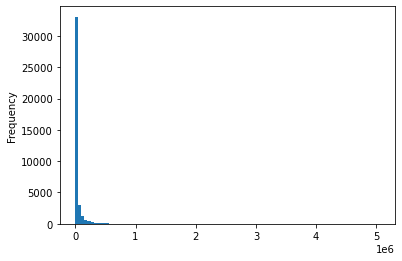

In [27]:
youtube_CA['likes'].plot.hist(bins=100)

<AxesSubplot:ylabel='Frequency'>

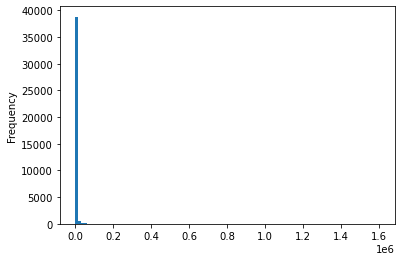

In [28]:
youtube_CA['dislikes'].plot.hist(bins=100)

* We can find that 'views''likes''dislikes' data is not normal distributed, so we do log-transformation for data for further analysis.

In [29]:
# log transform
youtube_CA['views_log'] = np.log(youtube_CA['views'])
youtube_CA['likes_log'] = np.log(youtube_CA['likes'])
youtube_CA['dislikes_log'] = np.log(youtube_CA['dislikes'])

# drop infinite values
youtube_CA = youtube_CA[np.isfinite(youtube_CA['likes_log'])]
youtube_CA = youtube_CA[np.isfinite(youtube_CA['views_log'])]
youtube_CA = youtube_CA[np.isfinite(youtube_CA['dislikes_log'])]


youtube_CA

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description,views_log,likes_log,dislikes_log
0,n1WpP7iowLc,17.14.11,Eminem - Walk On Water (Audio) ft. Beyoncé,EminemVEVO,10,2017-11-10T17:00:03.000Z,"Eminem|""Walk""|""On""|""Water""|""Aftermath/Shady/In...",17158579,787425,43420,125882,https://i.ytimg.com/vi/n1WpP7iowLc/default.jpg,False,False,False,Eminem's new track Walk on Water ft. Beyoncé i...,16.658009,13.576523,10.678675
1,0dBIkQ4Mz1M,17.14.11,PLUSH - Bad Unboxing Fan Mail,iDubbbzTV,23,2017-11-13T17:00:00.000Z,"plush|""bad unboxing""|""unboxing""|""fan mail""|""id...",1014651,127794,1688,13030,https://i.ytimg.com/vi/0dBIkQ4Mz1M/default.jpg,False,False,False,STill got a lot of packages. Probably will las...,13.830055,11.758175,7.431300
2,5qpjK5DgCt4,17.14.11,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,23,2017-11-12T19:05:24.000Z,"racist superman|""rudy""|""mancuso""|""king""|""bach""...",3191434,146035,5339,8181,https://i.ytimg.com/vi/5qpjK5DgCt4/default.jpg,False,False,False,WATCH MY PREVIOUS VIDEO ▶ \n\nSUBSCRIBE ► http...,14.975981,11.891602,8.582794
3,d380meD0W0M,17.14.11,I Dare You: GOING BALD!?,nigahiga,24,2017-11-12T18:01:41.000Z,"ryan|""higa""|""higatv""|""nigahiga""|""i dare you""|""...",2095828,132239,1989,17518,https://i.ytimg.com/vi/d380meD0W0M/default.jpg,False,False,False,I know it's been a while since we did this sho...,14.555459,11.792366,7.595387
4,2Vv-BfVoq4g,17.14.11,Ed Sheeran - Perfect (Official Music Video),Ed Sheeran,10,2017-11-09T11:04:14.000Z,"edsheeran|""ed sheeran""|""acoustic""|""live""|""cove...",33523622,1634130,21082,85067,https://i.ytimg.com/vi/2Vv-BfVoq4g/default.jpg,False,False,False,🎧: https://ad.gt/yt-perfect\n💰: https://atlant...,17.327761,14.306621,9.956175
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40876,sGolxsMSGfQ,18.14.06,HOW2: How to Solve a Mystery,Annoying Orange,24,2018-06-13T18:00:07.000Z,"annoying orange|""funny""|""fruit""|""talking""|""ani...",80685,1701,99,1312,https://i.ytimg.com/vi/sGolxsMSGfQ/default.jpg,False,False,False,🚨 NEW MERCH! http://amzn.to/annoyingorange 🚨➤ ...,11.298308,7.438972,4.595120
40877,8HNuRNi8t70,18.14.06,Eli Lik Lik Episode 13 Partie 01,Elhiwar Ettounsi,24,2018-06-13T19:01:18.000Z,"hkayet tounsia|""elhiwar ettounsi""|""denya okhra...",103339,460,66,51,https://i.ytimg.com/vi/8HNuRNi8t70/default.jpg,False,False,False,► Retrouvez vos programmes préférés : https://...,11.545770,6.131226,4.189655
40878,GWlKEM3m2EE,18.14.06,KINGDOM HEARTS III – SQUARE ENIX E3 SHOWCASE 2...,Kingdom Hearts,20,2018-06-11T17:30:53.000Z,"Kingdom Hearts|""KH3""|""Kingdom Hearts 3""|""Froze...",773347,25900,224,3881,https://i.ytimg.com/vi/GWlKEM3m2EE/default.jpg,False,False,False,Find out more about Kingdom Hearts 3: https://...,13.558483,10.161998,5.411646
40879,lbMKLzQ4cNQ,18.14.06,Trump Advisor Grovels To Trudeau,The Young Turks,25,2018-06-13T04:00:05.000Z,"180612__TB02SorryExcuse|""News""|""Politics""|""The...",115225,2115,182,1672,https://i.ytimg.com/vi/lbMKLzQ4cNQ/default.jpg,False,False,False,Peter Navarro isn’t talking so tough now. Ana ...,11.654642,7.656810,5.204007


In [30]:
# youtube_CA['views_log'].plot.hist()

<AxesSubplot:>

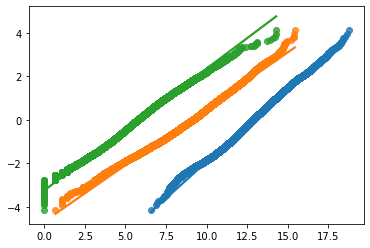

In [31]:
# use qq-plot to test normalization
qntls, xr = stats.probplot(youtube_CA['views_log'], fit=False)
sns.regplot(x=xr, y=qntls)
qntls, xr = stats.probplot(youtube_CA['likes_log'], fit=False)
sns.regplot(x=xr, y=qntls)
qntls, xr = stats.probplot(youtube_CA['dislikes_log'], fit=False)
sns.regplot(x=xr, y=qntls)

In [32]:
youtube_CA_lm_1 = ols('views ~ category_id', data=youtube_CA).fit()
table_1 = sm.stats.anova_lm(youtube_CA_lm_1, typ=2)  # Type 2 ANOVA DataFrame
table_1

,sum_sq,df,F,PR(>F)
category_id,9.218317e+15,1.0,806.228279,1.438999e-175
Residual,4.482881e+17,39207.0,NaN,NaN


In [33]:
# after log
youtube_CA_lm_2 = ols('views_log ~ category_id', data=youtube_CA).fit()
table_2 = sm.stats.anova_lm(youtube_CA_lm_2, typ=2)  # Type 2 ANOVA DataFrame
table_2

,sum_sq,df,F,PR(>F)
category_id,2116.057056,1.0,989.261187,1.816602e-214
Residual,83864.858044,39207.0,NaN,NaN


* Here, the PR(>F) is 1.438999e-175, and 1.816602e-214(after log transform) which is much smaller than 0.05, , implying that we can reject the null hypothesis (there is no relationship between views  and category_id) and conclude that there is a statistically significant difference between different category_ids of views of videos at the 95 percent confidence level.

In [34]:
# Create two different regression models where the dependent variable is the same, and the independent variables are different.
# What does your interpretation say about the two models?

In [35]:
youtube_CA_lm1 = smf.ols("views ~ likes", data=youtube_CA).fit()
youtube_CA_lm1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  views   R-squared:                       0.704
Model:                            OLS   Adj. R-squared:                  0.704
Method:                 Least Squares   F-statistic:                 9.305e+04
Date:                Sun, 13 Mar 2022   Prob (F-statistic):               0.00
Time:                        17:07:53   Log-Likelihood:            -6.2166e+05
No. Observations:               39209   AIC:                         1.243e+06
Df Residuals:                   39207   BIC:                         1.243e+06
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   3.022e+05   9814.978     30.786      0.000    2.83e+05    3.21e+05
likes         21.1955      0.069    305.045      0.000      21.059      21.332
==============================================================================
Omnibus:                    49284.948   Durbin-Watson:                   1.988
Prob(Omnibus):                  0.000   Jarque-Bera (JB):         83929811.586
Skew:                           6.022   Prob(JB):                         0.00
Kurtosis:                     229.338   Cond. No.                     1.48e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.48e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [36]:
youtube_CA_lm1_log = smf.ols("views_log ~ likes_log", data=youtube_CA).fit()
youtube_CA_lm1_log.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              views_log   R-squared:                       0.693
Model:                            OLS   Adj. R-squared:                  0.693
Method:                 Least Squares   F-statistic:                 8.856e+04
Date:                Sun, 13 Mar 2022   Prob (F-statistic):               0.00
Time:                        17:07:53   Log-Likelihood:                -47869.
No. Observations:               39209   AIC:                         9.574e+04
Df Residuals:                   39207   BIC:                         9.576e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      7.0757      0.020    356.143      0.000       7.037       7.115
likes_log      0.6407      0.002    297.592      0.000       0.636       0.645
==============================================================================
Omnibus:                       51.321   Durbin-Watson:                   1.875
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               56.109
Skew:                           0.054   Prob(JB):                     6.55e-13
Kurtosis:                       3.151   Cond. No.                         44.8
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [37]:
youtube_CA_lm2 = smf.ols("views ~ dislikes", data=youtube_CA).fit()
youtube_CA_lm2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  views   R-squared:                       0.318
Model:                            OLS   Adj. R-squared:                  0.318
Method:                 Least Squares   F-statistic:                 1.831e+04
Date:                Sun, 13 Mar 2022   Prob (F-statistic):               0.00
Time:                        17:07:53   Log-Likelihood:            -6.3798e+05
No. Observations:               39209   AIC:                         1.276e+06
Df Residuals:                   39207   BIC:                         1.276e+06
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   9.645e+05   1.43e+04     67.325      0.000    9.36e+05    9.93e+05
dislikes      99.3180      0.734    135.296      0.000      97.879     100.757
==============================================================================
Omnibus:                    61806.009   Durbin-Watson:                   1.924
Prob(Omnibus):                  0.000   Jarque-Bera (JB):         61772003.115
Skew:                           9.988   Prob(JB):                         0.00
Kurtosis:                     196.421   Cond. No.                     1.96e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.96e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [38]:
youtube_CA_lm2_log = smf.ols("views_log ~ dislikes_log", data=youtube_CA).fit()
youtube_CA_lm2_log.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              views_log   R-squared:                       0.784
Model:                            OLS   Adj. R-squared:                  0.784
Method:                 Least Squares   F-statistic:                 1.423e+05
Date:                Sun, 13 Mar 2022   Prob (F-statistic):               0.00
Time:                        17:07:53   Log-Likelihood:                -40986.
No. Observations:               39209   AIC:                         8.198e+04
Df Residuals:                   39207   BIC:                         8.199e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        8.5935      0.012    726.595      0.000       8.570       8.617
dislikes_log     0.7352      0.002    377.233      0.000       0.731       0.739
==============================================================================
Omnibus:                     2131.710   Durbin-Watson:                   1.936
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             3401.938
Skew:                          -0.459   Prob(JB):                         0.00
Kurtosis:                       4.113   Cond. No.                         21.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [39]:
# log_views-likes
7.0757+0.6407*50

39.1107

In [40]:
# log_views-dislikes
8.5935+0.7352*50

45.3535

* For views ~ likes:

* After log transformation, the intercept is 7.0757 and the coefficient of the predictor "likes" is 0.6407 in the model, for example we assume likes equals to 50, so the estimate for the value of "views" when the log value of "likes" is 50 is 7.0757+0.6407*50 == 39.1107;

*  After log transformation, the Coefficient of determination r2 is 0.693;

* The regression is statistically significant since the p-value for the F statistic is 0.00 which is much less than 0.05, indicating that the regression is statistically significant at 0.05 confidence level, which means we can reject the H0, so there is relation between views and likes.



* For views ~ dislikes:

* After log transformation, the intercept is 8.5935 and the coefficient of the predictor "likes" is 0.7352 in the model, for example we assume dislikes equals to 50, so the estimate for the value of "views" when the value of "dislikes" is 50 is 8.5935+0.7352*50 == 45.3535;

* After log transformation, the Coefficient of determination r2 is 0.784;

*  regression is statistically significant since the p-value for the F statistic is 0.00 which is much less than 0.05, indicating that the regression is statistically significant at 0.05 confidence level, which means we can reject the H0, so there is relation between views and dislikes.

* It seems that the effects of dislikes is larger than likes for views from our model;


## Part 2: Answer the questions below based on the *[Pokémon dataset](https://www.kaggle.com/abcsds/pokemon)* </span>
- Write Python code that can answer the following questions, and
- Explain your answers in plain English. 

### <span style="color:magenta"> Q4. For 10 Points: Plot the pairs of different ability points (HP, Attack, Sp. Attack, Defense, etc.). </span>

* Which pairs have the most/least correlation coefficients?

In [41]:
pokemon

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
6,6,Charizard,Fire,Flying,534,78,84,78,109,85,100,1,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
795,719,Diancie,Rock,Fairy,600,50,100,150,100,150,50,6,True
796,719,DiancieMega Diancie,Rock,Fairy,700,50,160,110,160,110,110,6,True
797,720,HoopaHoopa Confined,Psychic,Ghost,600,80,110,60,150,130,70,6,True
798,720,HoopaHoopa Unbound,Psychic,Dark,680,80,160,60,170,130,80,6,True


In [42]:
pokemon_ability = pokemon[['HP', 'Attack',
                           'Defense', 'Sp. Atk', 'Sp. Def', 'Speed']]
pokemon_ability

,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed
0,45,49,49,65,65,45
1,60,62,63,80,80,60
2,80,82,83,100,100,80
3,80,100,123,122,120,80
6,78,84,78,109,85,100
...,...,...,...,...,...,...
795,50,100,150,100,150,50
796,50,160,110,160,110,110
797,80,110,60,150,130,70
798,80,160,60,170,130,80


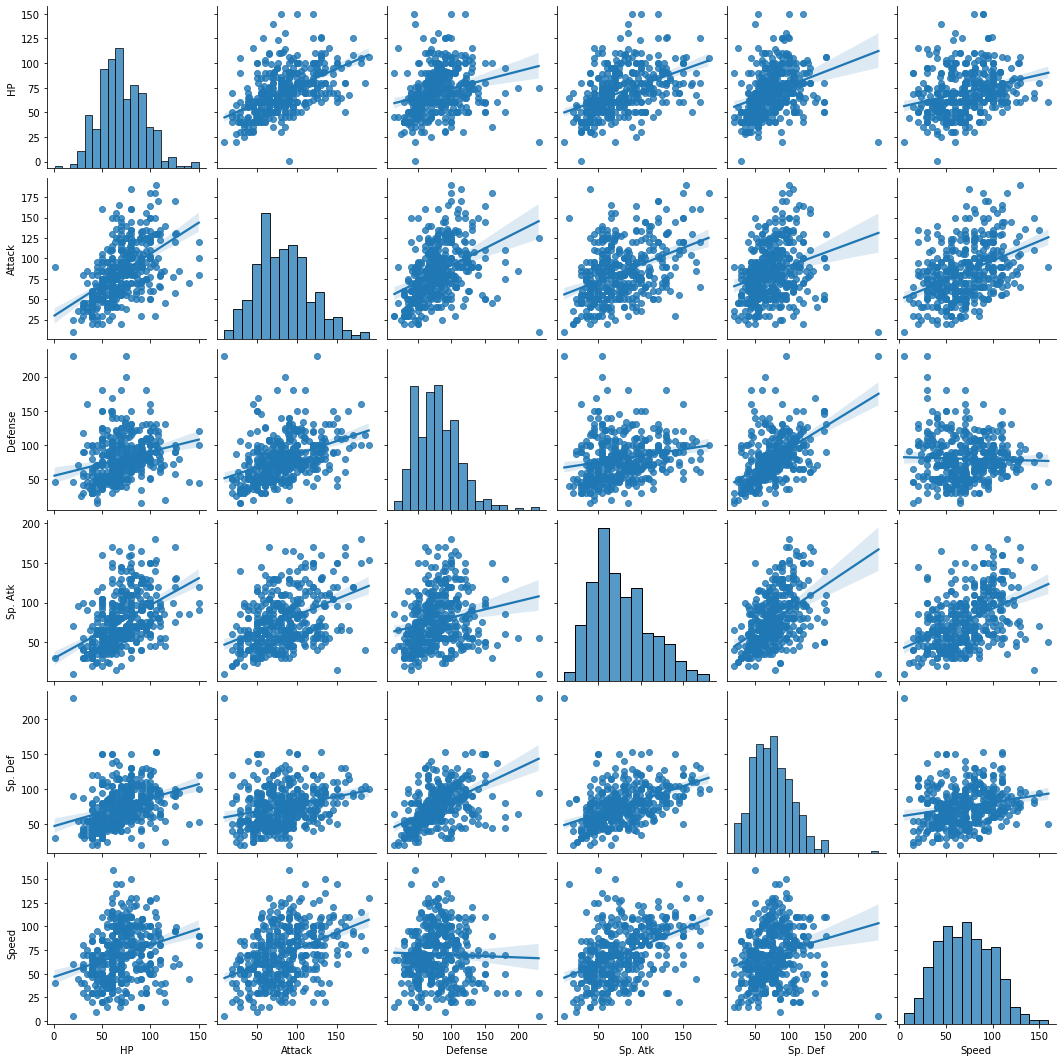

In [43]:
sns.pairplot(pokemon_ability, vars=[
             'HP', 'Attack', 'Defense', 'Sp. Atk', 'Sp. Def', 'Speed'], kind='reg')

In [44]:
pokemon_corr = pokemon_ability.corr()
pokemon_corr

,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed
HP,1.000000,0.518707,0.248920,0.456355,0.328665,0.271853
Attack,0.518707,1.000000,0.401001,0.408570,0.257964,0.403546
Defense,0.248920,0.401001,1.000000,0.196778,0.528286,-0.030993
Sp. Atk,0.456355,0.408570,0.196778,1.000000,0.480027,0.435450
Sp. Def,0.328665,0.257964,0.528286,0.480027,1.000000,0.208259
Speed,0.271853,0.403546,-0.030993,0.435450,0.208259,1.000000


In [45]:
# Which pairs have the most/least correlation coefficients?
pokemon_corr_abs = pokemon_ability.corr().abs()
pokemon_corr_abs

,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed
HP,1.000000,0.518707,0.248920,0.456355,0.328665,0.271853
Attack,0.518707,1.000000,0.401001,0.408570,0.257964,0.403546
Defense,0.248920,0.401001,1.000000,0.196778,0.528286,0.030993
Sp. Atk,0.456355,0.408570,0.196778,1.000000,0.480027,0.435450
Sp. Def,0.328665,0.257964,0.528286,0.480027,1.000000,0.208259
Speed,0.271853,0.403546,0.030993,0.435450,0.208259,1.000000


In [46]:
pokemon_corr_indexed = pokemon_corr_abs.unstack(
).sort_values(ascending=False).reset_index()

pokemon_corr_indexed

pokemon_corr_nosame = pokemon_corr_indexed[pokemon_corr_indexed['level_0']
                                           != pokemon_corr_indexed['level_1']]

pokemon_corr_nosame


def swap(x):
    if (x['level_0'] > x['level_1']):
        temp = x.level_0
        x.level_0 = x.level_1
        x.level_1 = temp
    return x


# swap and delete dupliacate, get variables we want
pokemon_corr_alpha = pokemon_corr_nosame.apply(swap, axis=1)
pokemon_corr_alpha

pokemon_corr_nodups = pokemon_corr_alpha.drop_duplicates()
pokemon_corr_nodups

# locate variables from original corr table with all -+ value
pokemon_corr_signed = pokemon_corr_nodups.apply(
    lambda x: pokemon_corr.loc[x.level_0][x.level_1], axis=1)
pokemon_corr_signed

# get final table, replace the value column
final = pd.concat([pokemon_corr_nodups.drop(
    0, axis=1), pokemon_corr_signed], axis=1)
final.columns = ['var1', 'var2', 'corr']
final

,var1,var2,corr
6,Defense,Sp. Def,0.528286
8,Attack,HP,0.518707
10,Sp. Atk,Sp. Def,0.480027
12,HP,Sp. Atk,0.456355
14,Sp. Atk,Speed,0.435450
16,Attack,Sp. Atk,0.408570
18,Attack,Speed,0.403546
20,Attack,Defense,0.401001
22,HP,Sp. Def,0.328665
24,HP,Speed,0.271853


* Defense~Sp. Def	has the most correlation coefficients, equals to 0.528286;
* Defense~Speed pair has the least correlation coefficients, equals to -0.030993;

### <span style="color:magenta"> Q5. For 15 Points: Plot the distribution of ability points per Pokémon type </span>

* How would you describe each Pokémon type with different ability points?

In [47]:
pokemon

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
6,6,Charizard,Fire,Flying,534,78,84,78,109,85,100,1,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
795,719,Diancie,Rock,Fairy,600,50,100,150,100,150,50,6,True
796,719,DiancieMega Diancie,Rock,Fairy,700,50,160,110,160,110,110,6,True
797,720,HoopaHoopa Confined,Psychic,Ghost,600,80,110,60,150,130,70,6,True
798,720,HoopaHoopa Unbound,Psychic,Dark,680,80,160,60,170,130,80,6,True


In [48]:
pokemon_types = pokemon.groupby(
    'Type 1')[['HP', 'Attack', 'Defense', 'Sp. Atk', 'Sp. Def', 'Speed']].mean()
pokemon_types

,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed
Type 1,,,,,,
Bug,58.134615,77.711538,75.730769,58.634615,71.711538,66.173077
Dark,69.809524,88.190476,74.523810,71.476190,73.238095,73.047619
Dragon,94.571429,122.571429,96.476190,116.238095,97.857143,94.666667
Electric,59.470588,68.882353,83.764706,108.882353,85.352941,84.470588
Fairy,70.000000,45.000000,90.000000,100.000000,110.000000,60.000000
Fighting,66.142857,95.857143,75.142857,82.571429,69.857143,88.285714
Fire,78.291667,92.166667,78.708333,105.458333,80.166667,76.791667
Flying,62.500000,50.000000,57.500000,71.000000,60.000000,89.000000
Ghost,71.318182,72.545455,78.090909,82.045455,70.590909,69.500000


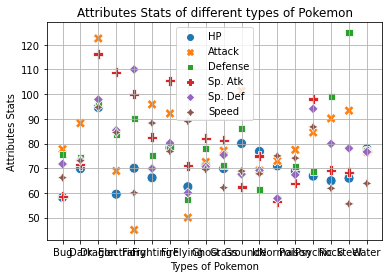

In [49]:
sns.scatterplot(data=pokemon_types, s=100)
plt.rcParams["figure.figsize"] = (20, 25)
# set labels
plt.xlabel('Types of Pokemon')
plt.ylabel('Attributes Stats')
# title
plt.title('Attributes Stats of different types of Pokemon')
plt.grid(True)

<AxesSubplot:xlabel='Type 1', ylabel='HP'>

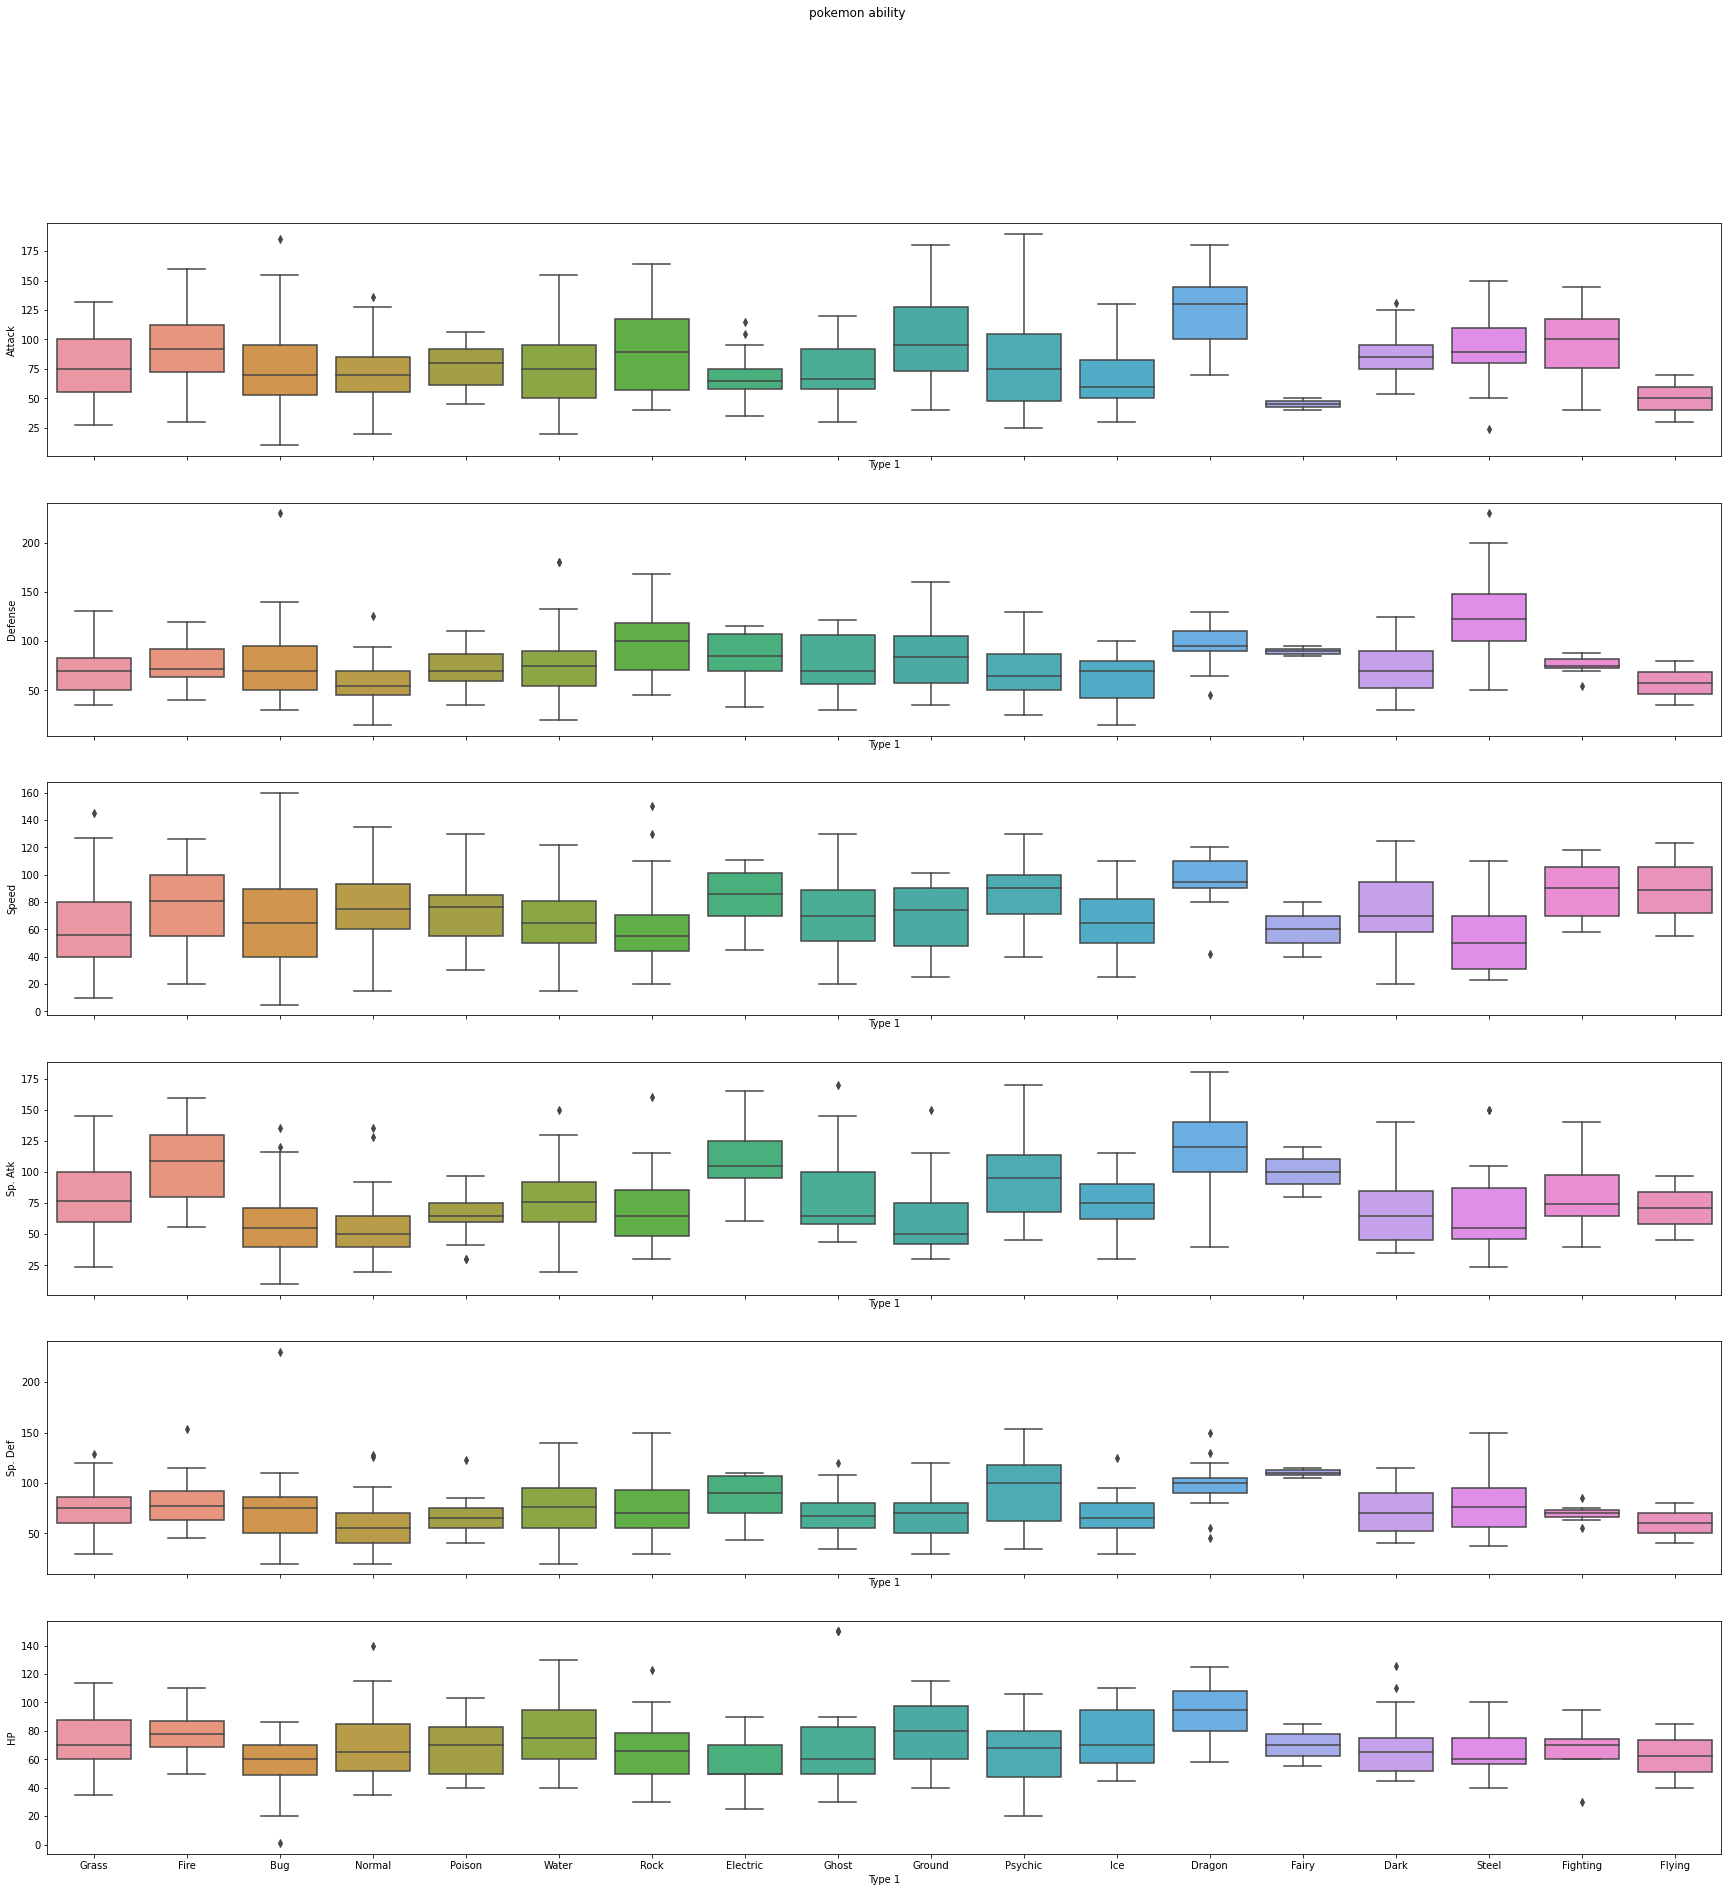

In [50]:
fig, axes = plt.subplots(6, sharex=True, figsize=(30,30))
fig.suptitle('pokemon ability')

sns.boxplot(ax=axes[0], data=pokemon, x='Type 1', y='Attack')
sns.boxplot(ax=axes[1], data=pokemon, x='Type 1', y='Defense')
sns.boxplot(ax=axes[2], data=pokemon, x='Type 1', y='Speed')
sns.boxplot(ax=axes[3], data=pokemon, x='Type 1', y='Sp. Atk')
sns.boxplot(ax=axes[4], data=pokemon, x='Type 1', y='Sp. Def')
sns.boxplot(ax=axes[5], data=pokemon, x='Type 1', y='HP')
# plt.rcParams["figure.figsize"] = (20, 20)


<AxesSubplot:xlabel='Type 1', ylabel='HP'>

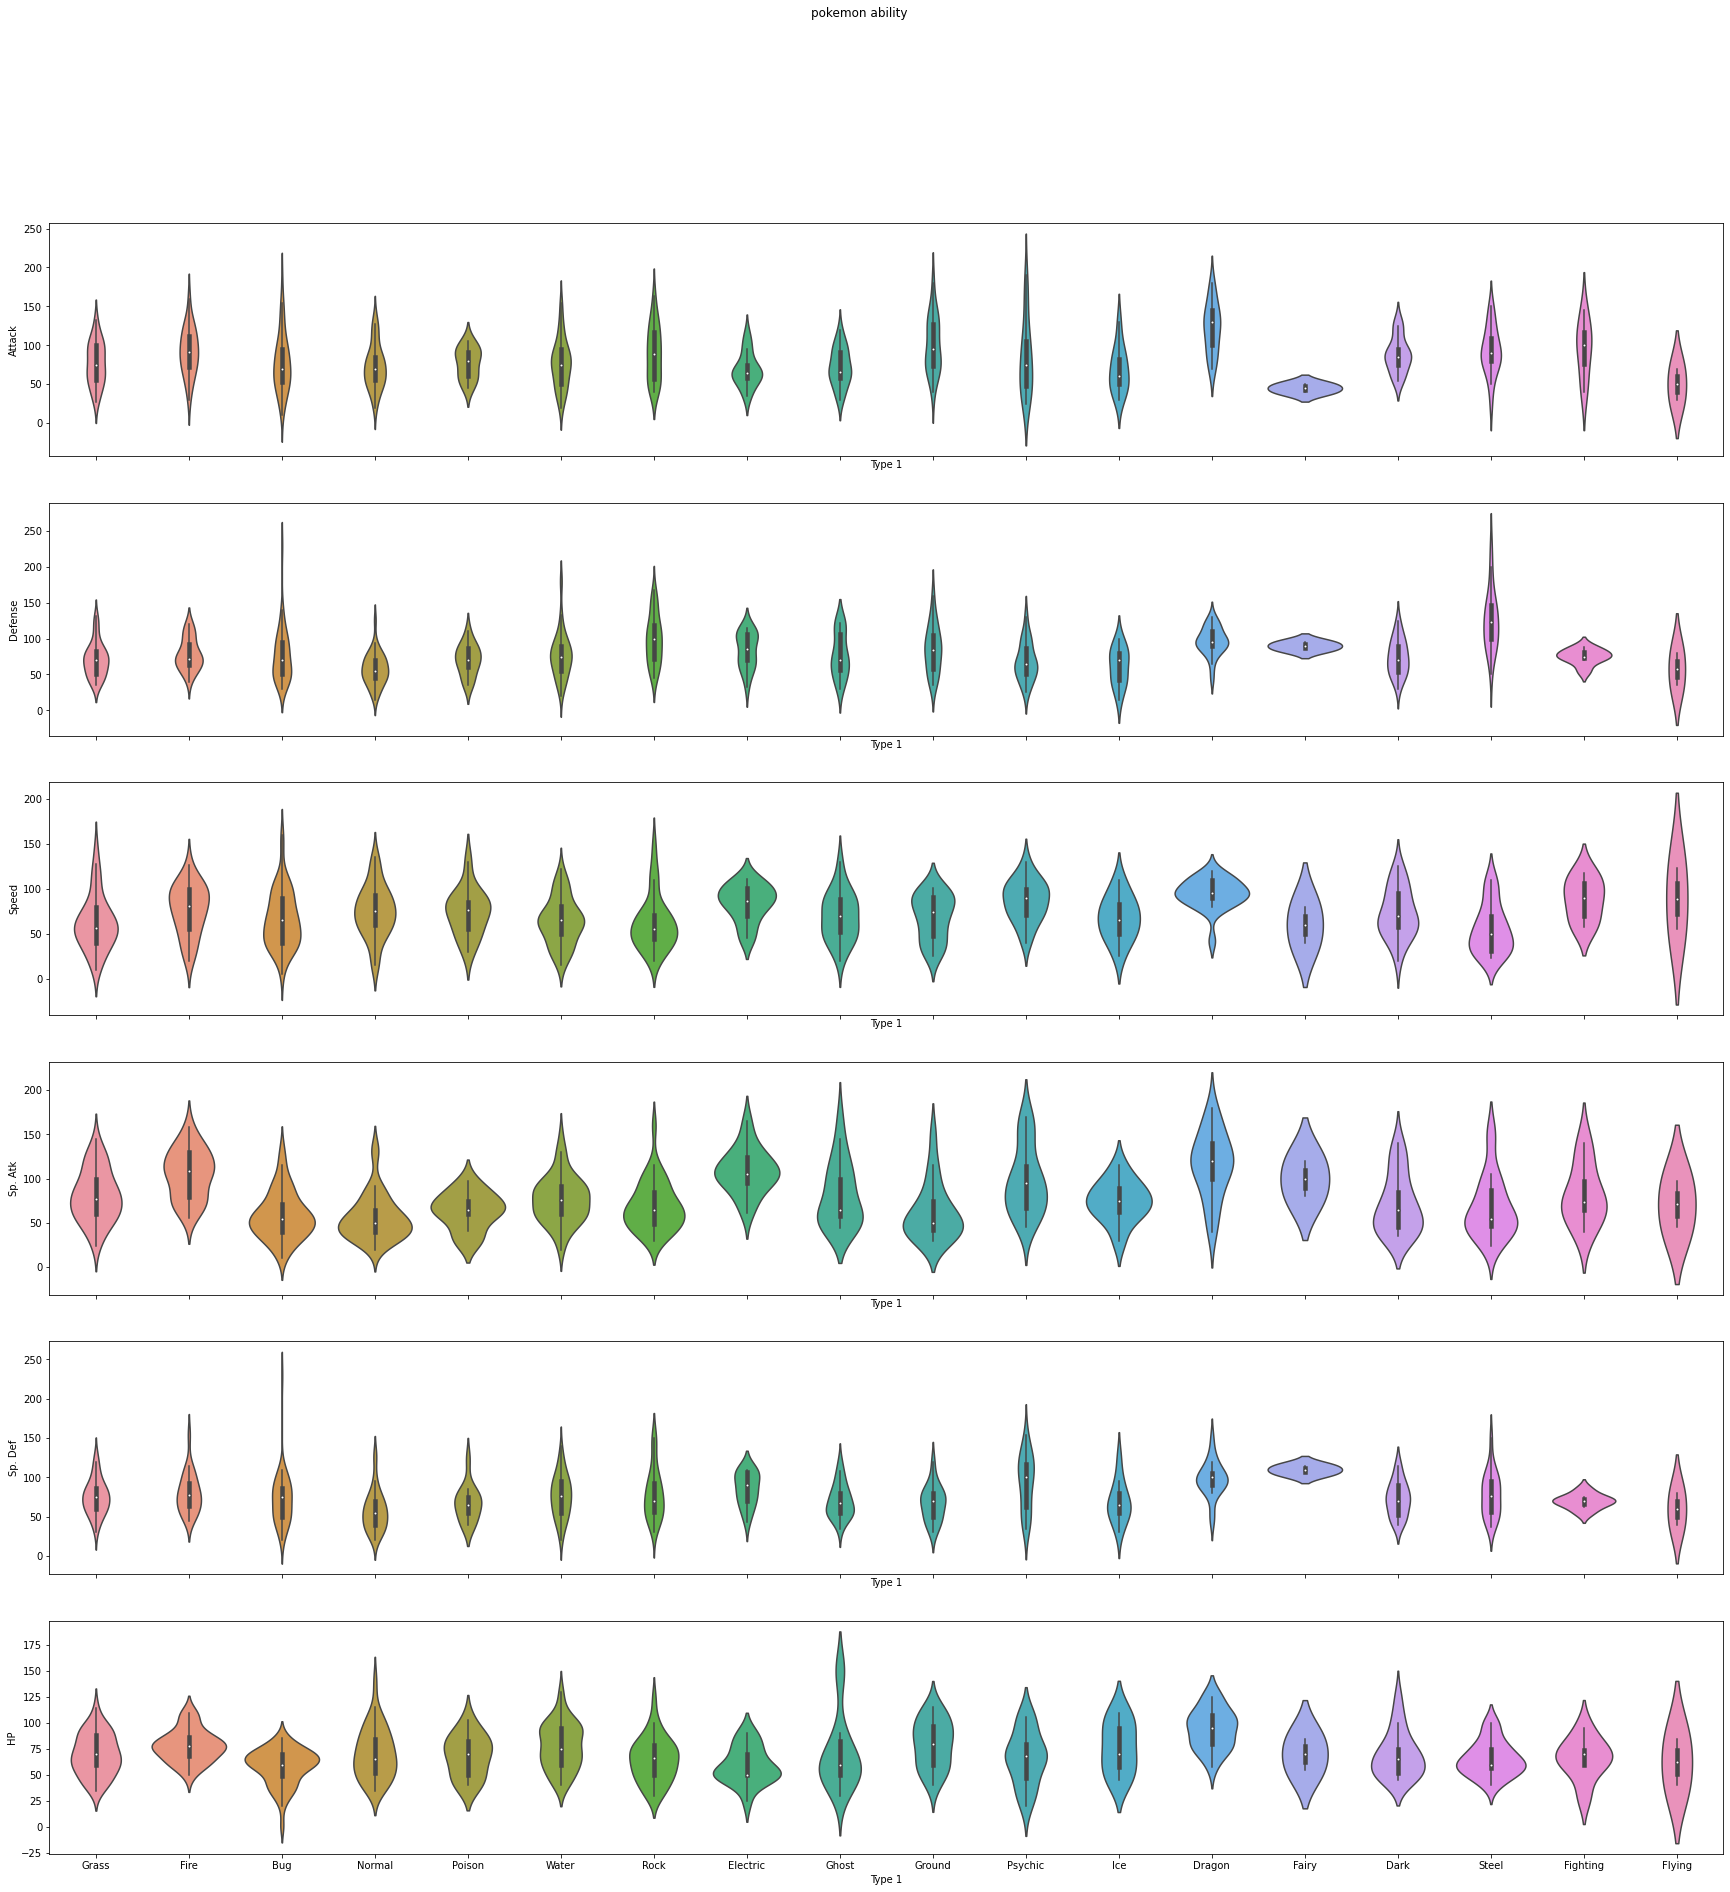

In [51]:
fig, axes = plt.subplots(6, sharex=True, figsize=(30,30))
fig.suptitle('pokemon ability')

sns.violinplot(ax=axes[0], data=pokemon, x='Type 1', y='Attack')
sns.violinplot(ax=axes[1], data=pokemon, x='Type 1', y='Defense')
sns.violinplot(ax=axes[2], data=pokemon, x='Type 1', y='Speed')
sns.violinplot(ax=axes[3], data=pokemon, x='Type 1', y='Sp. Atk')
sns.violinplot(ax=axes[4], data=pokemon, x='Type 1', y='Sp. Def')
sns.violinplot(ax=axes[5], data=pokemon, x='Type 1', y='HP')
# plt.rcParams["figure.figsize"] = (20, 20)


* I will use scatterplot to map out the distribution of attribute abilities for different types of Pokémon.

* I groupby and then take the mean of each attribute value to represent the average of each attribute value in each type, as I feel this is representative of the average for that type.

* As shown, the distribution of attribute values for each type is shown in its x-position column, represented by different colors and symbols, so we can clearly compare to find out what attribute values are highest and lowest for each type, and how they compare to other types.

* For example, Dragon's attack power is the highest and Fairy's attack power is the lowest.

* Then, I plot the boxplot and violinplot to show each detailed attribute abilities for different types of Pokémon, we can find that each type has different distribution of abilities, for example, Gost can have the highest HP, and Dragon type has good performance in nearly all aspects.

### <span style="color:magenta"> Q6. For 15 Points: Explore how the Pokémon in each generation differ from each other? </span>

* Do you think designers of *Pokémon* tried to address different distributions of ability points in each generation?

In [52]:
pokemon

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
6,6,Charizard,Fire,Flying,534,78,84,78,109,85,100,1,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
795,719,Diancie,Rock,Fairy,600,50,100,150,100,150,50,6,True
796,719,DiancieMega Diancie,Rock,Fairy,700,50,160,110,160,110,110,6,True
797,720,HoopaHoopa Confined,Psychic,Ghost,600,80,110,60,150,130,70,6,True
798,720,HoopaHoopa Unbound,Psychic,Dark,680,80,160,60,170,130,80,6,True


In [53]:
pokemon_generation = pokemon.groupby(
    'Generation')[['HP', 'Attack', 'Defense', 'Sp. Atk', 'Sp. Def', 'Speed']].mean()
pokemon_generation

,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed
Generation,,,,,,
1,68.307692,81.205128,77.141026,78.448718,70.756410,71.500000
2,70.400000,75.036364,80.781818,66.345455,79.345455,64.709091
3,66.817073,86.048780,77.768293,80.317073,74.170732,68.865854
4,73.671642,85.134328,83.044776,81.671642,82.014925,73.208955
5,75.646341,86.048780,78.024390,76.378049,73.426829,72.621951
6,68.620000,83.140000,83.740000,76.180000,76.060000,71.000000


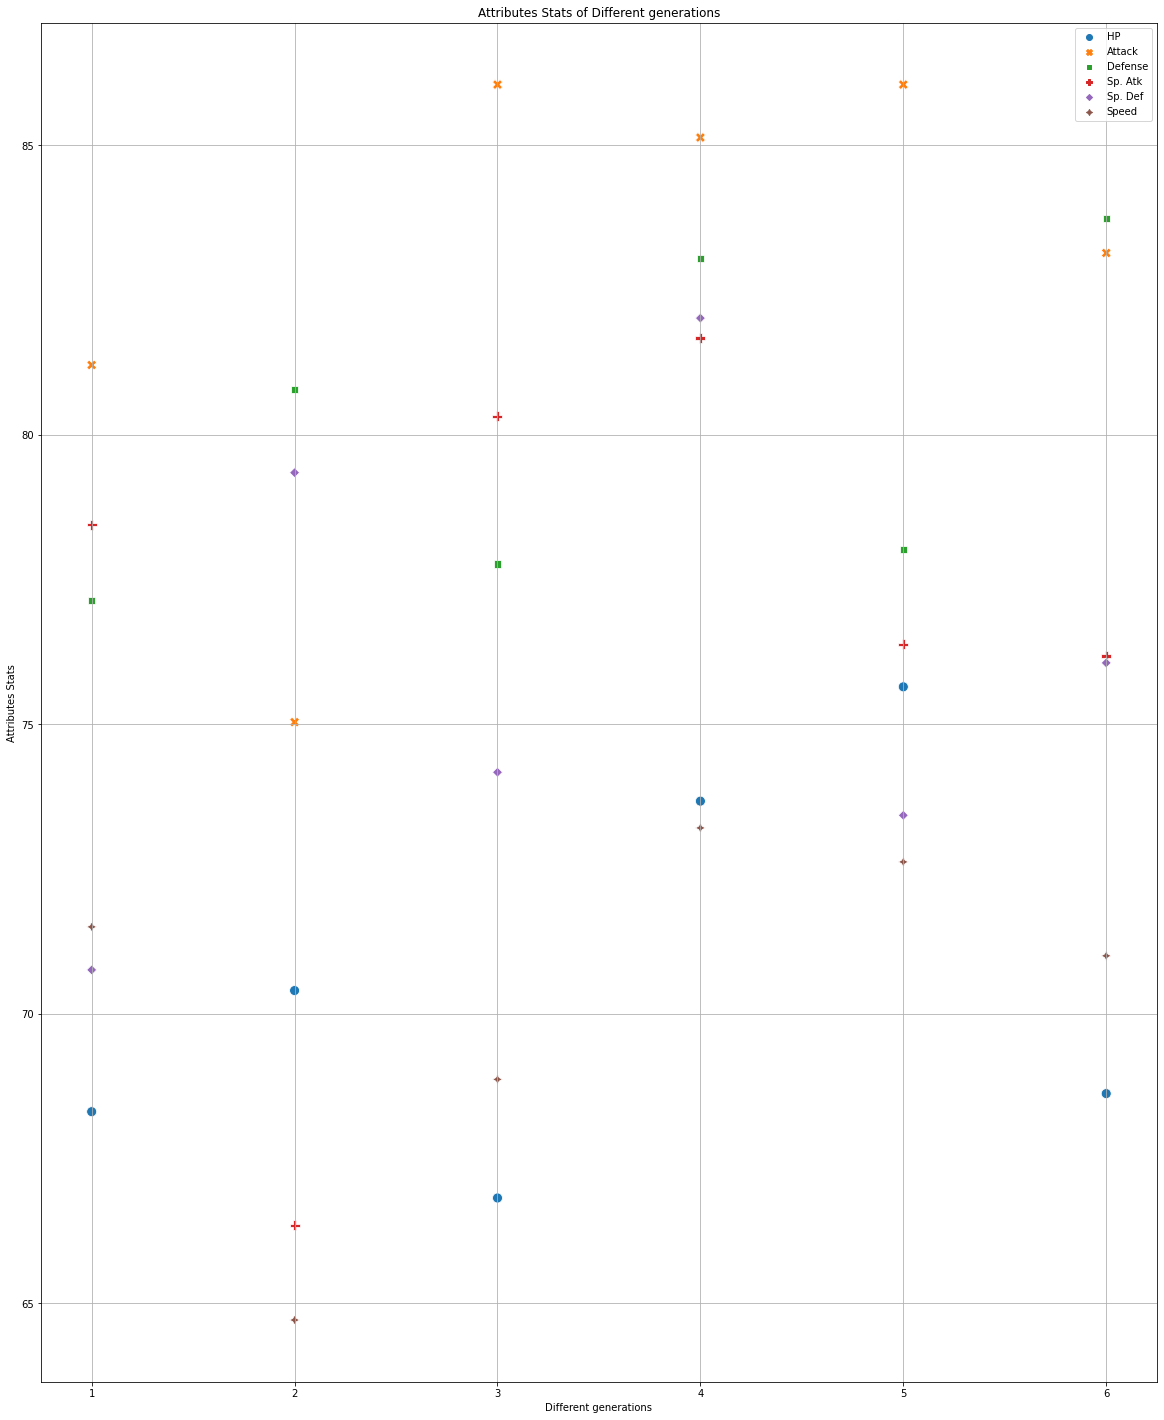

In [54]:
sns.scatterplot(data=pokemon_generation, s=100)
plt.rcParams["figure.figsize"] = (10, 10)
# set labels
plt.xlabel('Different generations')
plt.ylabel('Attributes Stats')
# title
plt.title('Attributes Stats of Different generations')
plt.grid(True)

In [55]:
# number of pokemon in each generation
display(len(pokemon[pokemon['Generation'] == 1]))
display(len(pokemon[pokemon['Generation'] == 2]))
display(len(pokemon[pokemon['Generation'] == 3]))
display(len(pokemon[pokemon['Generation'] == 4]))
display(len(pokemon[pokemon['Generation'] == 5]))
display(len(pokemon[pokemon['Generation'] == 6]))

78

55

82

67

82

50

* I do think that designers of Pokémon tried to address different distributions of ability points in each generation,  follow the figure above, we can find that the average value of each attribute varies from generation to generation;

* For example, attcak value decreases in the second generation, but then increases and maintains a relatively high average value in the 3rd, 4th, 5th and 6th generations;

* Another example is that the mean value of HP drops to a very low value in the 3rd generation, but rises somewhat in the 4th and 5th generations, but then decreases again in the 6th generation;

* The average attack value of the first generation is the highest and the average HP value is the lowest

* The average defense value of the second generation is the highest and the average speed is the lowest

* The average attack value of the third generation is the highest and the average HP value is the lowest, as in the first generation, but the values become higher or lower than those of the first generation

* The fourth generation has the highest average attack value and the lowest average speed and average HP, but the average speed and average HP are higher than in the previous three generations

* The average attack value of the fifth generation is the highest, the same as the fourth generation, but adjusted downward the average defense value and HP.

* The average defense value of the sixth generation is higher than the previous generations, but the average HP value has dropped again.

* Also, the number of Pokémon in each generation is not quite the same, from the first generation to the sixth generation are: 78, 55, 82, 67, 82, 50. but does not affect the results of our previous analysis, because we use the average value of the calculation of attributes, and is not affected by the number.

<AxesSubplot:xlabel='Generation', ylabel='HP'>

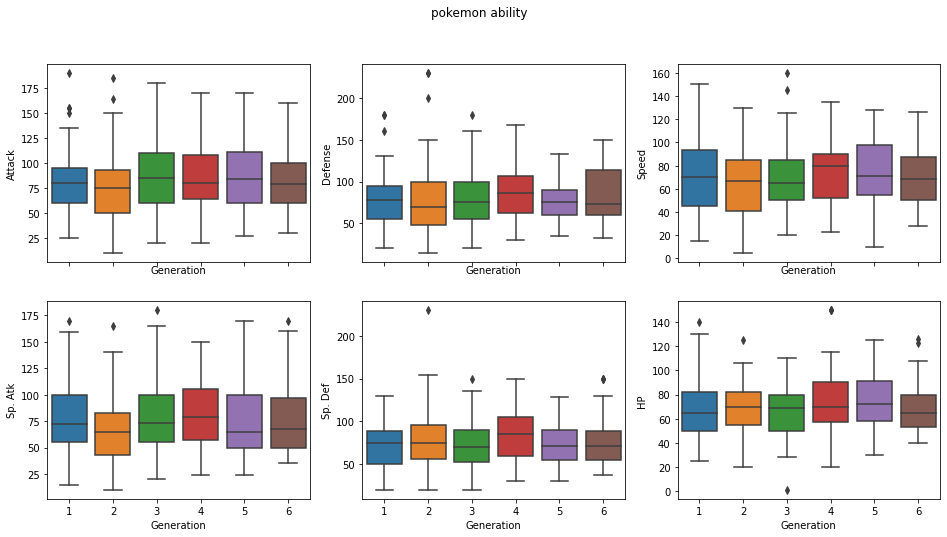

In [56]:
fig, axes = plt.subplots(2, 3, sharex=True, figsize=(16,8))
fig.suptitle('pokemon ability')

sns.boxplot(ax=axes[0, 0], data=pokemon, x='Generation', y='Attack')
sns.boxplot(ax=axes[0, 1], data=pokemon, x='Generation', y='Defense')
sns.boxplot(ax=axes[0, 2], data=pokemon, x='Generation', y='Speed')
sns.boxplot(ax=axes[1, 0], data=pokemon, x='Generation', y='Sp. Atk')
sns.boxplot(ax=axes[1, 1], data=pokemon, x='Generation', y='Sp. Def')
sns.boxplot(ax=axes[1, 2], data=pokemon, x='Generation', y='HP')

<AxesSubplot:xlabel='Generation', ylabel='HP'>

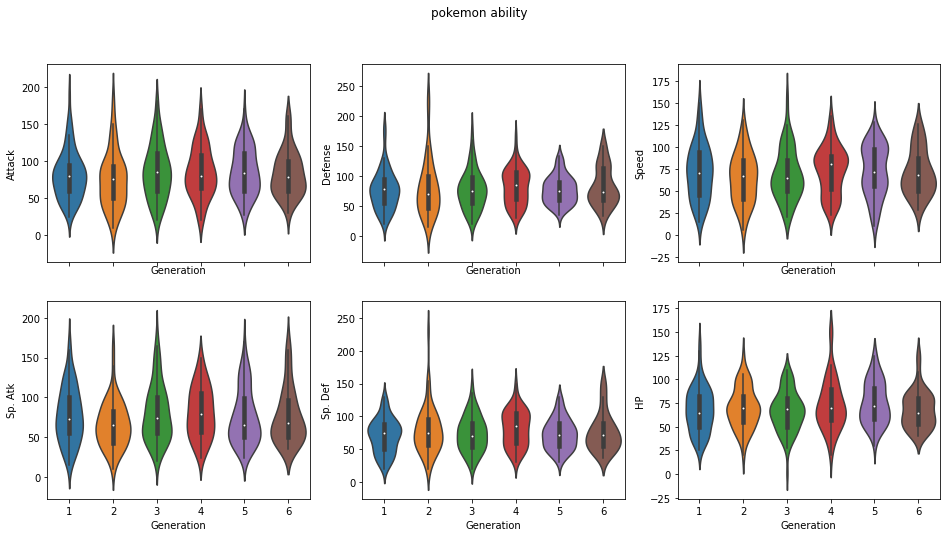

In [60]:
fig, axes = plt.subplots(2, 3, sharex=True, figsize=(16,8))
fig.suptitle('pokemon ability')

sns.violinplot(ax=axes[0, 0], data=pokemon, x='Generation', y='Attack')
sns.violinplot(ax=axes[0, 1], data=pokemon, x='Generation', y='Defense')
sns.violinplot(ax=axes[0, 2], data=pokemon, x='Generation', y='Speed')
sns.violinplot(ax=axes[1, 0], data=pokemon, x='Generation', y='Sp. Atk')
sns.violinplot(ax=axes[1, 1], data=pokemon, x='Generation', y='Sp. Def')
sns.violinplot(ax=axes[1, 2], data=pokemon, x='Generation', y='HP')

* We can find that different aspects of the attributes of each generation have been adjusted, such as HP in the fourth and fifth generation of most of the Pokémon will be higher, while the fifth generation of Defense is lower than the fourth generation.
* Attack: The 3rd, 4th and 5th generations are higher.
* Defense: is lower in the 5th generation.
* Speed: is lower overall in the second generation.
* Sp ATK: is lower in the second generation.
* Sp Def: is overall high for the 4th generation.
* HP: is higher in the fifth generation.

In [61]:
pokemon

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
6,6,Charizard,Fire,Flying,534,78,84,78,109,85,100,1,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
795,719,Diancie,Rock,Fairy,600,50,100,150,100,150,50,6,True
796,719,DiancieMega Diancie,Rock,Fairy,700,50,160,110,160,110,110,6,True
797,720,HoopaHoopa Confined,Psychic,Ghost,600,80,110,60,150,130,70,6,True
798,720,HoopaHoopa Unbound,Psychic,Dark,680,80,160,60,170,130,80,6,True


In [69]:

#  statistical approaches also needed here
from statsmodels.stats.multicomp import pairwise_tukeyhsd

gen_att = smf.ols('HP ~ C(Generation)', data=pokemon).fit()
gen_att.summary()


gen_att_pair = pairwise_tukeyhsd(pokemon['Attack'], pokemon['Generation'])
gen_att_pair.summary()

# also do these 2 tests for other attributes, 
# sns.violinplot(ax=axes[0, 0], data=pokemon, x='Generation', y='Attack')
# sns.violinplot(ax=axes[0, 1], data=pokemon, x='Generation', y='Defense')
# sns.violinplot(ax=axes[0, 2], data=pokemon, x='Generation', y='Speed')
# sns.violinplot(ax=axes[1, 0], data=pokemon, x='Generation', y='Sp. Atk')
# sns.violinplot(ax=axes[1, 1], data=pokemon, x='Generation', y='Sp. Def')
# sns.violinplot(ax=axes[1, 2], data=pokemon, x='Generation', y='HP')

group1,group2,meandiff,p-adj,lower,upper,reject
1,2,-6.1688,0.9,-23.1602,10.8227,False
1,3,4.8437,0.9,-10.4193,20.1066,False
1,4,3.9292,0.9,-12.1451,20.0035,False
1,5,4.8437,0.9,-10.4193,20.1066,False
1,6,1.9349,0.9,-15.5477,19.4175,False
2,3,11.0124,0.4212,-5.8068,27.8316,False
2,4,10.098,0.5585,-7.4608,27.6568,False
2,5,11.0124,0.4212,-5.8068,27.8316,False
2,6,8.1036,0.798,-10.7529,26.9602,False
3,4,-0.9145,0.9,-16.8066,14.9777,False


* we can find that the p-value is large, and no true in hsd, so it is means: we can not reject h0, the generation and attibutes are no relationship;
* so, designers of Pokémon do not try to address different distributions of ability points in each generation;
* 

In [59]:
# log transformation:
# when get a data, check hist and qqplot whether it is normal, if not, do log transformation to the numerical data, then normaled and then do the further stats analysis;

# log transformations can make highly skewed data less skewed, 
# making the data patterns easier to interpret and more consistent with the assumptions of statistical inference, 
# but not affecting the statistical conclusions